In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
salary = pd.read_csv("Current_Employee_Names__Salaries__and_Position_Titles.csv")
salary.head(5)

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,118998.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,97440.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,DAIS,F,Salary,NaN,121272.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,119712.0,NaN
4,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,40.0,NaN,45.9


In [3]:
# filtering into part-time employees (PTE) and full-time employees (PTE) & cleaning data
pte_raw = salary[salary["Full or Part-Time"] == 'P'][["Department", "Hourly Rate", "Typical Hours"]]
fte_raw = salary[salary["Full or Part-Time"] == 'F'][["Department", "Annual Salary"]]


In [4]:
# Filtering for  5 departments with more than 5 PTEs - make sure enough data points
pte_raw[["Department", "Hourly Rate"]].groupby(["Department"], as_index=False).count().sort_values("Hourly Rate", ascending=False)

,Department,Hourly Rate
5,FAMILY & SUPPORT,326
9,OEMC,281
11,PUBLIC LIBRARY,249
3,CITY COUNCIL,77
1,AVIATION,27
2,BUSINESS AFFAIRS,10
10,POLICE,10
0,ANIMAL CONTRL,7
4,DISABILITIES,3
6,FINANCE,2


In [5]:
# Same check for ftes
fte_raw[["Department", "Annual Salary"]].groupby(["Department"], as_index=False).count().sort_values("Annual Salary", ascending=False)

,Department,Annual Salary
27,POLICE,12807
16,FIRE,4785
30,PUBLIC LIBRARY,706
26,OEMC,674
2,AVIATION,624
17,HEALTH,512
15,FINANCE,442
33,TRANSPORTN,365
35,WATER MGMNT,348
23,LAW,331


In [6]:
# removing departments that have too few employees
pte_raw2 = pte_raw[~pte_raw["Department"].isin(['DISABILITIES', 'FINANCE', 'HEALTH', 'LAW', 'WATER MGMNT'])]
fte_raw2 = fte_raw[~fte_raw["Department"].isin(['POLICE BOARD', 'LICENSE APPL COMM'])]



In [7]:
# removing departments that don't have both PTEs and FTEs or have too few values (<5)

def unique(list1):
    x = np.array(list1)
    print(np.unique(x))
    
pte_depts = unique(pte_raw2["Department"])
fte_depts = unique(fte_raw2["Department"])

pte_depts_list = ['ANIMAL CONTRL', 'AVIATION', 'BUSINESS AFFAIRS', 'CITY COUNCIL','FAMILY & SUPPORT', 'OEMC', 'POLICE', 'PUBLIC LIBRARY']
fte = fte_raw2[fte_raw2["Department"].isin(pte_depts_list)]
pte = pte_raw2

['ANIMAL CONTRL' 'AVIATION' 'BUSINESS AFFAIRS' 'CITY COUNCIL'
 'FAMILY & SUPPORT' 'OEMC' 'POLICE' 'PUBLIC LIBRARY']
['ADMIN HEARNG' 'ANIMAL CONTRL' 'AVIATION' 'BOARD OF ELECTION'
 'BOARD OF ETHICS' 'BUDGET & MGMT' 'BUILDINGS' 'BUSINESS AFFAIRS'
 'CITY CLERK' 'CITY COUNCIL' 'COPA' 'CULTURAL AFFAIRS' 'DAIS'
 'DISABILITIES' 'FAMILY & SUPPORT' 'FINANCE' 'FIRE' 'HEALTH' 'HOUSING'
 'HOUSING & ECON DEV' 'HUMAN RELATIONS' 'HUMAN RESOURCES' 'INSPECTOR GEN'
 'LAW' "MAYOR'S OFFICE" 'OEMC' 'POLICE' 'PROCUREMENT' 'PUBLIC LIBRARY'
 'PUBLIC SAFETY ADMIN' 'STREETS & SAN' 'TRANSPORTN' 'TREASURER'
 'WATER MGMNT']


In [8]:
unique(pte_raw["Department"])

['ANIMAL CONTRL' 'AVIATION' 'BUSINESS AFFAIRS' 'CITY COUNCIL'
 'DISABILITIES' 'FAMILY & SUPPORT' 'FINANCE' 'HEALTH' 'LAW' 'OEMC'
 'POLICE' 'PUBLIC LIBRARY' 'WATER MGMNT']


In [9]:
pte[["Department", "Hourly Rate"]].groupby("Department", as_index=False).mean().sort_values("Hourly Rate", ascending=False)



,Department,Hourly Rate
0,ANIMAL CONTRL,24.880000
5,OEMC,21.607402
1,AVIATION,21.472593
3,CITY COUNCIL,19.400649
7,PUBLIC LIBRARY,18.524859
2,BUSINESS AFFAIRS,15.000000
6,POLICE,14.474000
4,FAMILY & SUPPORT,5.817117


In [10]:
# creating x-position and value labels for mean salary for FTEs to use in graph
fte_salary_means = fte[["Department", "Annual Salary"]].groupby("Department", as_index=False).mean().sort_values("Annual Salary", ascending=False)
fte_position = fte_salary_means["Annual Salary"].to_list()
fte_label = ['$90,914.68', '$88,426.67', '$88,291.16', '$84,494.20', '$78,681.25', '$77,658.22', '$75,533.81', '$75,402.76']

In [11]:
# creating x-position and value labels for mean salary for PTEs to use in graph
pte_salary_means = pte[["Department", "Hourly Rate"]].groupby("Department", as_index=False).mean().sort_values("Hourly Rate", ascending=False)
pte_position = pte_salary_means["Hourly Rate"].to_list()
pte_position
pte_label = ['$24.88', '$21.61', '$21.47', '$19.40', '$18.52', '$15.00', '$14.47', '$5.82']


Text(0, 0.5, 'Number of Part-Time Employees')

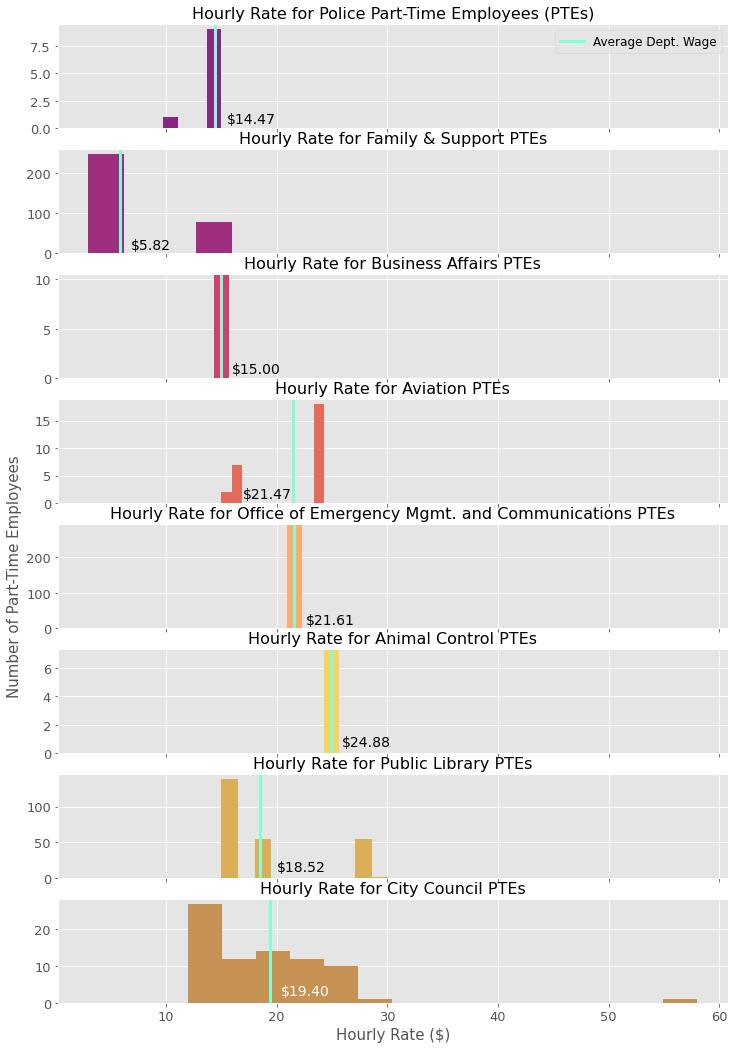

In [63]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8, sharex=True)
fig.set_figheight(18)
fig.set_figwidth(12)

plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=15)  # fontsize of the figure title

ax1.hist(pte[pte["Department"] == "POLICE"]["Hourly Rate"], color="#872781", bins = 4)
ax1.axvline(x=pte[pte["Department"] == "POLICE"]["Hourly Rate"].mean(), color="aquamarine", label="Average Dept. Wage", linewidth=3)
ax1.set_title("Hourly Rate for Police Part-Time Employees (PTEs)")
ax1.text(pte_position[6]+1, 0.5, pte_label[6], color="black")
ax1.legend()

ax2.hist(pte[pte["Department"] == "FAMILY & SUPPORT"]["Hourly Rate"], color="#9d2f7e")
ax2.axvline(x=pte[pte["Department"] == "FAMILY & SUPPORT"]["Hourly Rate"].mean(), color="aquamarine", linewidth=3)
ax2.set_title("Hourly Rate for Family & Support PTEs")
ax2.text(pte_position[7]+1, 10, pte_label[7], color="black")


ax3.hist(pte[pte["Department"] == "BUSINESS AFFAIRS"]["Hourly Rate"], color="#ce4070")
ax3.axvline(x=pte[pte["Department"] == "BUSINESS AFFAIRS"]["Hourly Rate"].mean(), color="#ce4070", linewidth=15)
ax3.axvline(x=pte[pte["Department"] == "BUSINESS AFFAIRS"]["Hourly Rate"].mean(), color="aquamarine", linewidth=3)
ax3.set_title("Hourly Rate for Business Affairs PTEs")
ax3.text(pte_position[5]+1, 0.5, pte_label[5], color="black")


ax4.hist(pte[pte["Department"] == "AVIATION"]["Hourly Rate"], color="#e46a5c")
ax4.axvline(x=pte[pte["Department"] == "AVIATION"]["Hourly Rate"].mean(), color="aquamarine", linewidth=3)
ax4.set_title("Hourly Rate for Aviation PTEs")
ax4.text(pte_position[2]-4.5, 1, pte_label[2], color="black")

ax5.hist(pte[pte["Department"] == "OEMC"]["Hourly Rate"], color="#ffa973")
ax5.axvline(x=pte[pte["Department"] == "OEMC"]["Hourly Rate"].mean(), color="#ffa973", linewidth=15)
ax5.axvline(x=pte[pte["Department"] == "OEMC"]["Hourly Rate"].mean(), color="aquamarine", linewidth=3)
ax5.set_title("Hourly Rate for Office of Emergency Mgmt. and Communications PTEs")
ax5.text(pte_position[1]+1, 10, pte_label[1], color="black")


ax6.hist(pte[pte["Department"] == "ANIMAL CONTRL"]["Hourly Rate"], color="#f6d365")
ax6.axvline(x=pte[pte["Department"] == "ANIMAL CONTRL"]["Hourly Rate"].mean(), color="#f6d365", linewidth=15)
ax6.axvline(x=pte[pte["Department"] == "ANIMAL CONTRL"]["Hourly Rate"].mean(), color="aquamarine", linewidth=3)
ax6.set_title("Hourly Rate for Animal Control PTEs")
ax6.text(pte_position[0]+1, 0.5, pte_label[0], color="black")


ax7.hist(pte[pte["Department"] == "PUBLIC LIBRARY"]["Hourly Rate"], color="#dbaf57")
ax7.axvline(x=pte[pte["Department"] == "PUBLIC LIBRARY"]["Hourly Rate"].mean(), color="aquamarine", linewidth=3)
ax7.set_title("Hourly Rate for Public Library PTEs")
ax7.text(pte_position[4]+1.5, 10, pte_label[4], color="black")

ax8.hist(pte[pte["Department"] == "CITY COUNCIL"]["Hourly Rate"], color="#c69254", bins=15)
ax8.axvline(x=pte[pte["Department"] == "CITY COUNCIL"]["Hourly Rate"].mean(), color="aquamarine", linewidth=3)
ax8.set_title("Hourly Rate for City Council PTEs")
ax8.text(pte_position[3]+1, 2, pte_label[3], color="white")

ax8.set_xlabel('Hourly Rate ($)')
ax5.set_ylabel('Number of Part-Time Employees')



Text(0, 0.5, 'Number of Full-Time Employees')

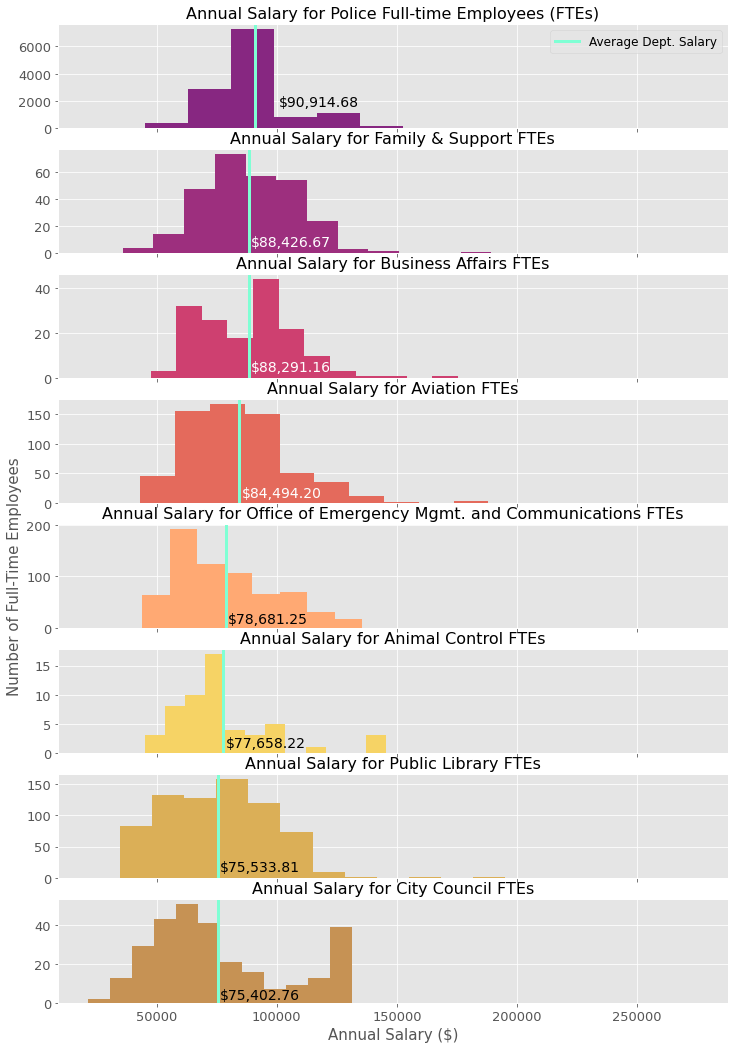

In [65]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8, sharex=True)
fig.set_figheight(18)
fig.set_figwidth(12)

plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=15)  # fontsize of the figure title

ax1.hist(fte[fte["Department"] == "POLICE"]["Annual Salary"], color="#872781", bins=12)
ax1.axvline(x=fte[fte["Department"] == "POLICE"]["Annual Salary"].mean(), color="aquamarine", linewidth=3, alpha=1, label="Average Dept. Salary")
ax1.set_title("Annual Salary for Police Full-time Employees (FTEs)")
ax1.text(fte_position[0]+10000, 1600, fte_label[0], color="black")
ax1.legend()

ax2.hist(fte[fte["Department"] == "FAMILY & SUPPORT"]["Annual Salary"], color="#9d2f7e", bins=12)
ax2.axvline(x=fte[fte["Department"] == "FAMILY & SUPPORT"]["Annual Salary"].mean(), color="aquamarine", linewidth=3)
ax2.set_title("Annual Salary for Family & Support FTEs")
ax2.text(fte_position[1]+1000, 5, fte_label[1], color="white")


ax3.hist(fte[fte["Department"] == "BUSINESS AFFAIRS"]["Annual Salary"], color="#ce4070", bins=12)
ax3.axvline(x=fte[fte["Department"] == "BUSINESS AFFAIRS"]["Annual Salary"].mean(), color="aquamarine", linewidth=3)
ax3.set_title("Annual Salary for Business Affairs FTEs")
ax3.text(fte_position[2]+1000, 3, fte_label[2], color="white")


ax4.hist(fte[fte["Department"] == "AVIATION"]["Annual Salary"], color="#e46a5c", bins=16)
ax4.axvline(x=fte[fte["Department"] == "AVIATION"]["Annual Salary"].mean(), color="aquamarine", linewidth=3)
ax4.set_title("Annual Salary for Aviation FTEs")
ax4.text(fte_position[3]+1000, 10, fte_label[3], color="white")


ax5.hist(fte[fte["Department"] == "OEMC"]["Annual Salary"], color="#ffa973", bins=12)
ax5.axvline(x=fte[fte["Department"] == "OEMC"]["Annual Salary"].mean(), color="aquamarine", linewidth=3)
ax5.set_title("Annual Salary for Office of Emergency Mgmt. and Communications FTEs")
ax5.text(fte_position[4]+1000, 10, fte_label[4], color="black")


ax6.hist(fte[fte["Department"] == "ANIMAL CONTRL"]["Annual Salary"], color="#f6d365", bins=12)
ax6.axvline(x=fte[fte["Department"] == "ANIMAL CONTRL"]["Annual Salary"].mean(), color="aquamarine", linewidth=3)
ax6.set_title("Annual Salary for Animal Control FTEs")
ax6.text(fte_position[5]+1000, 1, fte_label[5], color="black")

ax7.hist(fte[fte["Department"] == "PUBLIC LIBRARY"]["Annual Salary"], color="#dbaf57", bins=12)
ax7.axvline(x=fte[fte["Department"] == "PUBLIC LIBRARY"]["Annual Salary"].mean(), color="aquamarine", linewidth=3)
ax7.set_title("Annual Salary for Public Library FTEs")
ax7.text(fte_position[6]+1000, 10, fte_label[6], color="black")


ax8.hist(fte[fte["Department"] == "CITY COUNCIL"]["Annual Salary"], color="#c69254", bins=12)
ax8.axvline(x=fte[fte["Department"] == "CITY COUNCIL"]["Annual Salary"].mean(), color="aquamarine", linewidth=3)
ax8.set_title("Annual Salary for City Council FTEs")
ax8.text(fte_position[7]+1000, 2, fte_label[7], color="black")

ax8.set_xlabel('Annual Salary ($)')
ax5.set_ylabel('Number of Full-Time Employees')



